## Experiment 2.1
Consider the Iris flower dataset. It has 4 features - sepal length in cm, sepal width in cm, petal length in cm, petal width in cm.

We will also add 2 other features called artificial_feature_1 and arificial_feature_2 with custom values. 

For 5% of the data samples, we give an extremely large value of artificial_feature_1 and for another 5% of the data samples, an extremely large value of artificial_feature_2. Rest of the samples have value 0 for these features. 

We will define the process of explaning an outlier as the process of identifying the right feature(s) that makes the data sample an outlier.

Given this scenario, we expect artificial_feature_1 to be the explanation when a data sample from the first 5% of data is chosen. Simillarly, artificial_feature_1 as the explanation when any data sample from the second 5% data is chosen. 

In [1]:
from src.ocsvm.OneClassSVMClassifier import OneClassSVMClassifier
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets

# Load the Iris dataset
iris = datasets.load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Initialize the new features
df['artificial_feature_1'] = 0
df['artificial_feature_2'] = 0

In [2]:
# Set random seed for reproducibility
np.random.seed(1)

# Calculate the number of samples
num_samples = df.shape[0]
num_samples_to_modify = int(num_samples * 0.05)
num_samples_to_modify

7

In [3]:
feature_names = df.columns.tolist()
feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)',
 'artificial_feature_1',
 'artificial_feature_2']

In [4]:
# Randomly select 5% of the indices for artificial_feature_1
indices_feature_1 = np.random.choice(df.index, size=num_samples_to_modify, replace=False)

# Assign a large value to artificial_feature_1 for these indices
df.loc[indices_feature_1, 'artificial_feature_1'] = np.random.randint(10, 15, size=len(indices_feature_1))

In [5]:
# Randomly select 5% of the indices for artificial_feature_2, ensuring no overlap
remaining_indices = np.setdiff1d(df.index, indices_feature_1)
indices_feature_2 = np.random.choice(remaining_indices, size=num_samples_to_modify, replace=False)

# Assign a large value to artificial_feature_2 for these indices
df.loc[indices_feature_2, 'artificial_feature_2'] = np.random.randint(10, 15, size=len(indices_feature_2))

In [6]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),artificial_feature_1,artificial_feature_2
0,5.1,3.5,1.4,0.2,0,0
1,4.9,3.0,1.4,0.2,0,12
2,4.7,3.2,1.3,0.2,0,0
3,4.6,3.1,1.5,0.2,0,0
4,5.0,3.6,1.4,0.2,0,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0,0
146,6.3,2.5,5.0,1.9,0,0
147,6.5,3.0,5.2,2.0,0,0
148,6.2,3.4,5.4,2.3,0,0


In [7]:
non_zero_count_feature_1 = (df['artificial_feature_1'] != 0).sum()
non_zero_count_feature_1

np.int64(7)

In [8]:
non_zero_count_feature_2 = (df['artificial_feature_2'] != 0).sum()
non_zero_count_feature_2

np.int64(7)

In [9]:
x_data = df.values

In [10]:
# Create a OCSVM Classifier Class
classifier = OneClassSVMClassifier(x_data, nu=0.15)

In [11]:
decision, y_pred = classifier.fit()

[[1.00000000e+00 2.06920053e-07 9.72647705e-01 ... 1.19839731e-01
  9.95395725e-02 1.60691859e-01]
 [2.06920053e-07 1.00000000e+00 2.11381770e-07 ... 2.46390481e-08
  1.98631417e-08 3.38949433e-08]
 [9.72647705e-01 2.11381770e-07 1.00000000e+00 ... 9.84834597e-02
  8.14526562e-02 1.39289608e-01]
 ...
 [1.19839731e-01 2.46390481e-08 9.84834597e-02 ... 1.00000000e+00
  9.60277155e-01 9.57209179e-01]
 [9.95395725e-02 1.98631417e-08 8.14526562e-02 ... 9.60277155e-01
  1.00000000e+00 9.39006072e-01]
 [1.60691859e-01 3.38949433e-08 1.39289608e-01 ... 9.57209179e-01
  9.39006072e-01 1.00000000e+00]]
[0.99999999 0.98598385 0.99999999 0.99999987 0.99999999 0.99999999
 0.91638405 0.9999996  0.16766634 0.9187321  0.66171817 0.99999997
 0.99185716 0.19852962 0.99999998 0.09340074 0.99999985 0.09434072
 0.47137704 0.99999995 0.99999992 0.99999988 0.99999991 0.99999919
 0.99999998 0.99999996 0.99999985]
[  1  13  14  15  16  29  33  41  50  56  60  65  75  95  98 100 106 109
 114 115 117 118 119 122

In [12]:
decision

array([ 3.45411960e-01, -1.49807421e+00,  2.86161259e-01,  3.25375240e-01,
        3.23711614e-01,  2.94441219e-01,  3.00816286e-01,  3.94545019e-01,
        1.83672054e-01,  3.61896733e-01,  2.86893909e-01,  3.98034747e-01,
        3.01316345e-01, -7.58581798e-06, -2.17610837e+00, -1.44079934e-01,
       -1.67898846e+00,  3.63874946e-01,  2.18744316e-01,  3.11289494e-01,
        4.00701046e-01,  3.58482241e-01,  6.16836943e-02,  4.99891655e-01,
        4.44097706e-01,  4.13136720e-01,  4.57145924e-01,  3.72048836e-01,
        3.50361789e-01, -1.54147988e+00,  4.06054700e-01,  3.78074165e-01,
        1.16530822e-01, -5.53208677e-06,  3.90588255e-01,  2.78144613e-01,
        2.24114769e-01,  2.89271279e-01,  1.62649899e-01,  3.94258202e-01,
        3.22850228e-01, -4.74718884e-02,  1.76745511e-01,  4.40006238e-01,
        4.00447405e-01,  3.47499448e-01,  3.18508747e-01,  2.96230937e-01,
        3.08725077e-01,  3.67353989e-01, -9.14123254e-06,  1.94130175e-01,
        1.25629996e-01,  

In [13]:
# Check for the number of outliers

counts = {1: np.sum(y_pred == 1), -1: np.sum(y_pred == -1)}
total = len(y_pred)
percentages = {key: (count / total) * 100 for key, count in counts.items()}

results = {key: {"count": counts[key], "percentage": percentages[key]} for key in counts}

print(results)

{1: {'count': np.int64(123), 'percentage': np.float64(82.0)}, -1: {'count': np.int64(27), 'percentage': np.float64(18.0)}}


In [14]:
# Outlier sample indices
indices = [i for i, value in enumerate(y_pred) if value == -1]
print(indices)

[1, 13, 14, 15, 16, 29, 33, 41, 50, 56, 60, 65, 75, 95, 98, 100, 106, 109, 114, 115, 117, 118, 119, 122, 131, 138, 141]


In [15]:
indices_feature_1

array([ 14,  98,  75,  16, 131,  56, 141])

In [16]:
indices_feature_2

array([138,   1, 119,  65, 115,  29,  95])

In [17]:
# Check if all points in the feature arrays are in the indices array
all_in_indices_1 = np.all(np.isin(indices_feature_1, indices))
all_in_indices_2 = np.all(np.isin(indices_feature_2, indices))

# Find missing indices from the feature arrays
missing_indices_1 = indices_feature_1[~np.isin(indices_feature_1, indices)]
missing_indices_2 = indices_feature_2[~np.isin(indices_feature_2, indices)]

# Calculate the total number of points in the feature arrays
total_points_feature_1 = len(indices_feature_1)
total_points_feature_2 = len(indices_feature_2)

# Calculate the percentage of points covered
covered_points_1 = total_points_feature_1 - len(missing_indices_1)
covered_points_2 = total_points_feature_2 - len(missing_indices_2)

percentage_covered_1 = (covered_points_1 / total_points_feature_1) * 100
percentage_covered_2 = (covered_points_2 / total_points_feature_2) * 100

In [18]:
if all_in_indices_1:
    print("All indices from Feature 1 are present in the indices array.")
else:
    print(f"Missing indices from Feature 1: {sorted(missing_indices_1)}")
    
if all_in_indices_2:
    print("All indices from Feature 2 are present in the indices array.")
else:
    print(f"Missing indices from Feature 2: {sorted(missing_indices_2)}")

# Print percentage coverage
print(f"Percentage of points covered in Feature 1: {percentage_covered_1:.2f}%")
print(f"Percentage of points covered in Feature 2: {percentage_covered_2:.2f}%")

All indices from Feature 1 are present in the indices array.
All indices from Feature 2 are present in the indices array.
Percentage of points covered in Feature 1: 100.00%
Percentage of points covered in Feature 2: 100.00%


In [19]:

other_outliers = list(set(indices).difference(set(indices_feature_1).union(set(indices_feature_2))))
other_outliers


[33, 100, 41, 106, 13, 109, 15, 50, 114, 117, 118, 122, 60]

In [20]:
from src.explanation_algorithms.OCSVMSHAP import OCSVMSHAP
ocsvm_shap = OCSVMSHAP(X=x_data, classifier=classifier)
ocsvm_shap.fit_ocsvmshap(X=x_data, num_coalitions=2**x_data.shape[1])

/home/swathi/OCSVM-SHAP/src/utils/shapley_procedure/coalitions.py:18: RuntimeWarning: divide by zero encountered in log2
  set_to_1 = np.floor(np.log2(rest)).astype(int)
/home/swathi/OCSVM-SHAP/src/utils/shapley_procedure/coalitions.py:18: RuntimeWarning: invalid value encountered in cast
  set_to_1 = np.floor(np.log2(rest)).astype(int)
/home/swathi/OCSVM-SHAP/src/utils/shapley_procedure/coalitions.py:18: RuntimeWarning: invalid value encountered in log2
  set_to_1 = np.floor(np.log2(rest)).astype(int)
Parallel projections:   0%|          | 0/63 [00:00<?, ?it/s]

Parallel projections: 100%|██████████| 63/63 [00:02<00:00, 23.96it/s]


In [21]:
from src.utils.visualisation.deterministic_values import global_bar_plot, local_bar_plot, summary_plot
mean_stochastic_shapley_values = ocsvm_shap.return_deterministic_shapley_values()

/home/swathi/micromamba/envs/myenv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


/home/swathi/OCSVM-SHAP/src/utils/visualisation/deterministic_values.py:17: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shapley_values, show=False, **kwargs)


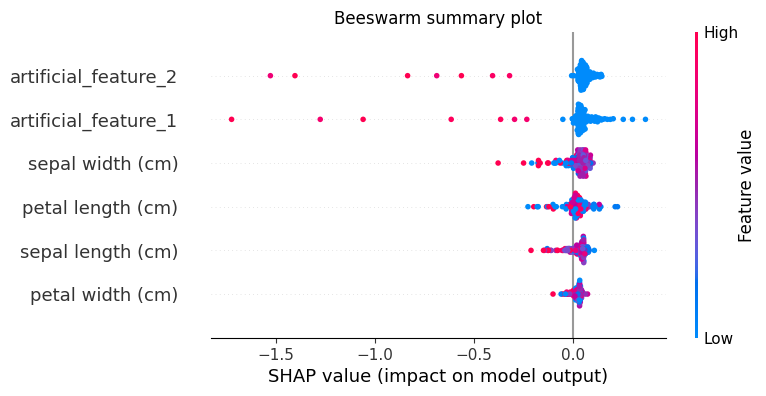

In [22]:
#summary chart
summary_plot(mean_stochastic_shapley_values.T.numpy(), feature_names=feature_names, features=x_data)

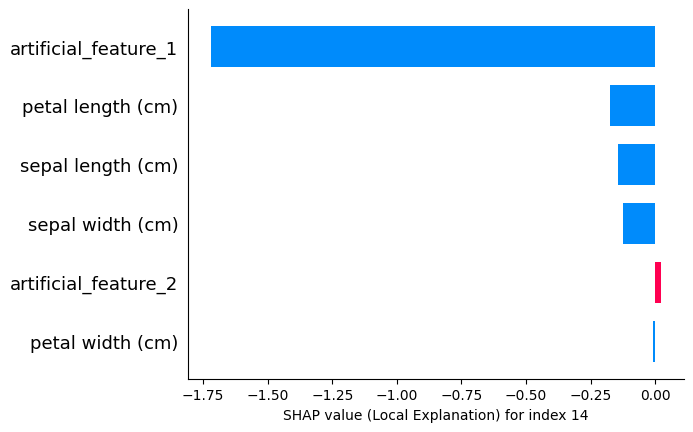

In [23]:
local_bar_plot(mean_stochastic_shapley_values, 14, feature_names=feature_names)

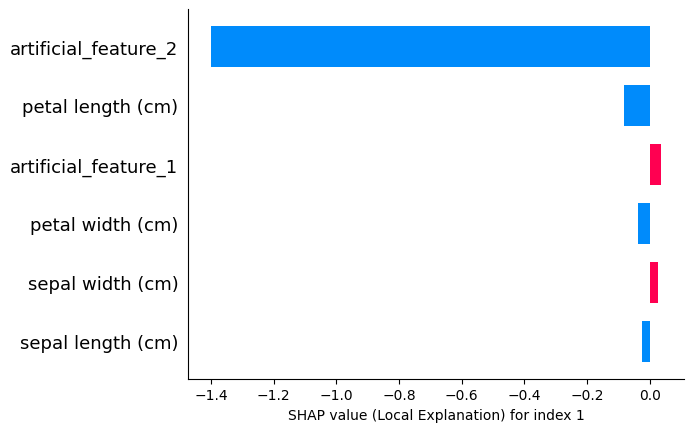

In [24]:
local_bar_plot(mean_stochastic_shapley_values, 1, feature_names=feature_names)

All outliers from the picked sample has been recognized along with a few other outliers.

/tmp/ipykernel_90341/2904515673.py:5: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  summed_shapley_values_1 = mean_stochastic_shapley_values.T[i] + summed_shapley_values_1
/tmp/ipykernel_90341/2904515673.py:7: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  summed_shapley_values_2 = mean_stochastic_shapley_values.T[i] + summed_shapley_values_2


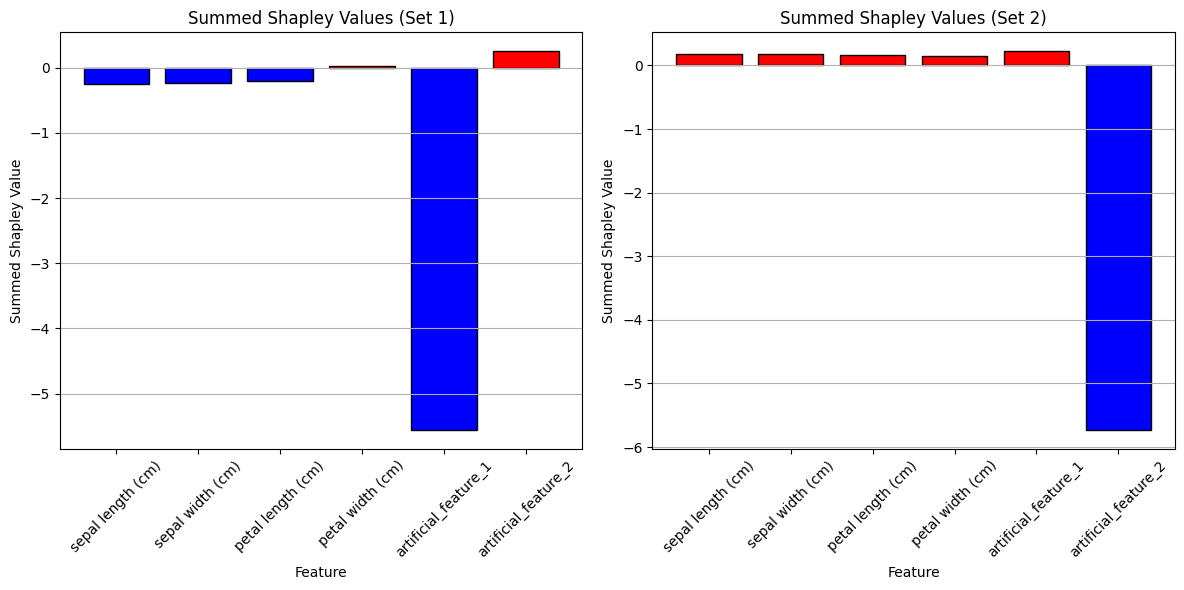

In [25]:
summed_shapley_values_1 = np.zeros(6, dtype='float32')
summed_shapley_values_2 = np.zeros(6, dtype='float32')

for i in indices_feature_1:
    summed_shapley_values_1 = mean_stochastic_shapley_values.T[i] + summed_shapley_values_1
for i in indices_feature_2: 
    summed_shapley_values_2 = mean_stochastic_shapley_values.T[i] + summed_shapley_values_2

fig, ax = plt.subplots(1, 2, figsize=(12, 6))

for i, value in enumerate(summed_shapley_values_1):
    color = 'red' if value >= 0 else 'blue'  
    ax[0].bar(i, value, color=color, edgecolor='black')  
ax[0].set_xticks(range(6)), ax[0].set_xticklabels(feature_names, rotation=45)
ax[0].set_title('Summed Shapley Values (Set 1)')
ax[0].set_xlabel('Feature'), ax[0].set_ylabel('Summed Shapley Value')
ax[0].grid(True, axis='y')

for i, value in enumerate(summed_shapley_values_2):
    color = 'red' if value >= 0 else 'blue'  
    ax[1].bar(i, value, color=color, edgecolor='black')  
ax[1].set_xticks(range(6)), ax[1].set_xticklabels(feature_names, rotation=45)
ax[1].set_title('Summed Shapley Values (Set 2)')
ax[1].set_xlabel('Feature'), ax[1].set_ylabel('Summed Shapley Value')
ax[1].grid(True, axis='y')
plt.tight_layout()
plt.show()

/tmp/ipykernel_90341/4211771680.py:6: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  summed_shapley_values_other = mean_stochastic_shapley_values.T[i] + summed_shapley_values_other


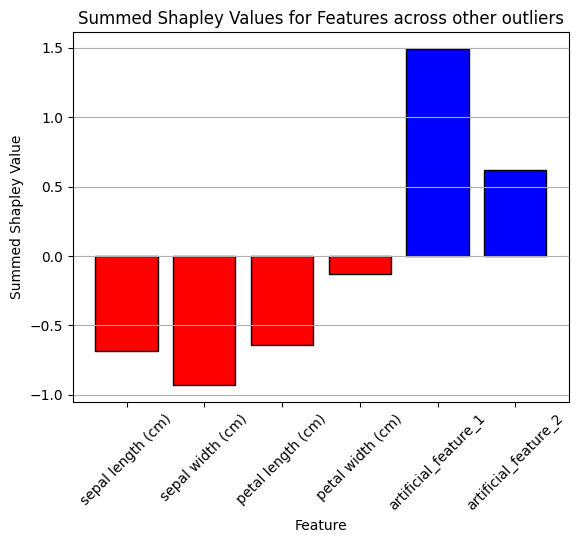

In [26]:
#Histogram for indicies of other outliers

summed_shapley_values_other = np.zeros(6, dtype='float32')

for i in other_outliers:
    summed_shapley_values_other = mean_stochastic_shapley_values.T[i] + summed_shapley_values_other

for i, value in enumerate(summed_shapley_values_other):
    color = 'blue' if value >= 0 else 'red' 
    plt.bar(i, value, color=color, edgecolor='black')  #

plt.xticks(range(6), feature_names)
plt.xticks(rotation=45)  
plt.title('Summed Shapley Values for Features across other outliers')
plt.xlabel('Feature')
plt.ylabel('Summed Shapley Value')
plt.grid(True, axis='y')
plt.show()

In [27]:
feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)',
 'artificial_feature_1',
 'artificial_feature_2']

/tmp/ipykernel_90341/3068266003.py:2: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  mean_abs_shap_values_2 = np.abs(mean_stochastic_shapley_values.T).mean(axis=0)
/home/swathi/OCSVM-SHAP/src/utils/visualisation/deterministic_values.py:12: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at /pytorch/aten/src/ATen/native/TensorShape.cpp:3725.)
  shap.bar_plot(shapley_values.T, show=False, max_display=20,**kwargs)


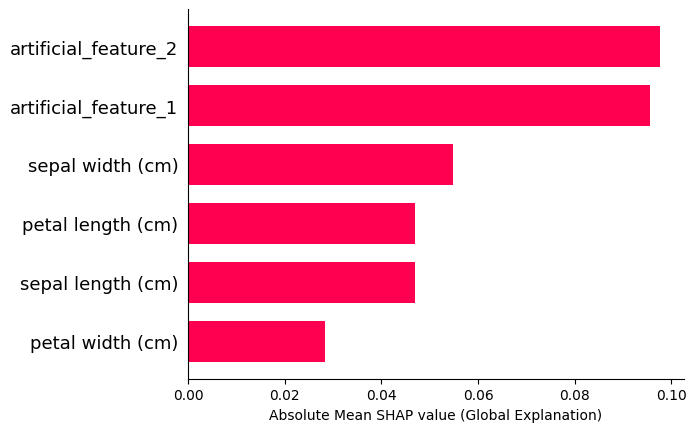

In [28]:
# global importance measure
mean_abs_shap_values_2 = np.abs(mean_stochastic_shapley_values.T).mean(axis=0) 

# Call bar_plot for global explanation
global_bar_plot(mean_abs_shap_values_2, feature_names=feature_names)

/tmp/ipykernel_90341/860659180.py:2: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  mean_abs_shap_values_outlier_group_1 = np.abs(selected_shap_values).mean(axis=1)


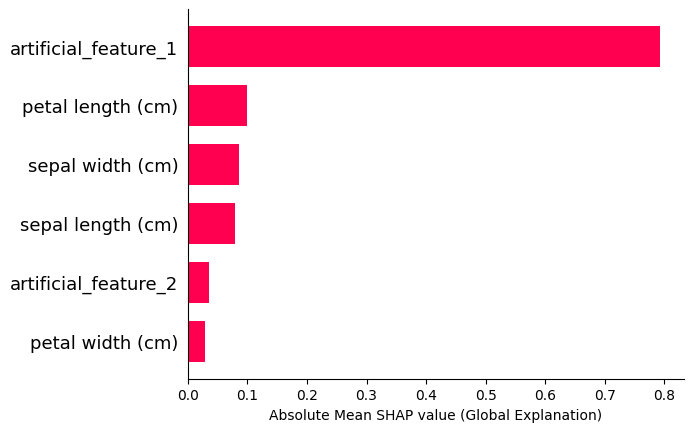

In [29]:
selected_shap_values = mean_stochastic_shapley_values[:,indices_feature_1]
mean_abs_shap_values_outlier_group_1 = np.abs(selected_shap_values).mean(axis=1) 
global_bar_plot(mean_abs_shap_values_outlier_group_1, feature_names=feature_names)

/tmp/ipykernel_90341/3631875452.py:2: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  mean_abs_shap_values_outlier_group_2 = np.abs(selected_shap_values).mean(axis=1)


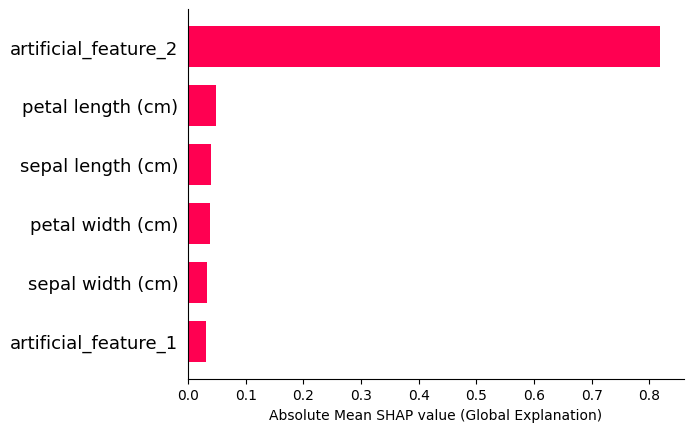

In [30]:
selected_shap_values = mean_stochastic_shapley_values[:,indices_feature_2]
mean_abs_shap_values_outlier_group_2 = np.abs(selected_shap_values).mean(axis=1) 
global_bar_plot(mean_abs_shap_values_outlier_group_2, feature_names=feature_names)

## Experiment 2.2

Let us try to use a larger dataset. 
Consider the Wine Quality dataset from the UCI Machine Learning Repository

In [ ]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
wine_data = pd.read_csv(url, sep=';')
wine_data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [32]:
selected_columns = wine_data.drop(columns=["quality"])
selected_columns

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


We will also add 2 other features called artificial_feature_1 and arificial_feature_2 with custom values. 

For 5% of the data samples, we give an extremely large value of artificial_feature_1 and for another 5% of the data samples, an extremely large value of artificial_feature_2. Rest of the samples have value between 1 and 5 for these features. 

We will define the process of explaning an outlier as the process of identifying the right feature(s) that makes the data sample an outlier.

Given this scenario, we expect artificial_feature_1 to be the explanation when a data sample from the first 5% of data is chosen. Simillarly, artificial_feature_1 as the explanation when any data sample from the second 5% data is chosen. 

In [33]:
# Set random seed for reproducibility
np.random.seed(9)

# Initialize the new features
selected_columns['artificial_feature_1'] = np.random.randint(1, 6, size=len(selected_columns))
selected_columns['artificial_feature_2'] = np.random.randint(1, 6, size=len(selected_columns))

selected_columns

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,artificial_feature_1,artificial_feature_2
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,2
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,1,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,4,1
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,2,5
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,4,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,1,2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,4,4
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,1,4


In [34]:
# Calculate the number of samples
num_samples = selected_columns.shape[0]
num_samples_to_modify = int(num_samples * 0.05)
num_samples_to_modify

79

In [35]:
feature_names = selected_columns.columns.tolist()
feature_names

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'artificial_feature_1',
 'artificial_feature_2']

In [36]:
# Randomly select 5% of the indices for artificial_feature_1
indices_feature_1 = np.random.choice(selected_columns.index, size=num_samples_to_modify, replace=False)

# Assign a large value to artificial_feature_1 for these indices
selected_columns.loc[indices_feature_1, 'artificial_feature_1'] = np.random.randint(100, 150, size=len(indices_feature_1))

In [37]:
# Randomly select 5% of the indices for artificial_feature_2, ensuring no overlap
remaining_indices = np.setdiff1d(selected_columns.index, indices_feature_1)
indices_feature_2 = np.random.choice(remaining_indices, size=num_samples_to_modify, replace=False)

# Assign a large value to artificial_feature_2 for these indices
selected_columns.loc[indices_feature_2, 'artificial_feature_2'] = np.random.randint(100, 150, size=len(indices_feature_2))

In [38]:
selected_columns

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,artificial_feature_1,artificial_feature_2
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,2
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,1,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,4,1
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,2,5
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,4,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,1,2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,4,4
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,1,4


In [39]:
non_zero_count_feature_1 = (selected_columns['artificial_feature_1'] > 5).sum()
non_zero_count_feature_1

np.int64(79)

In [40]:
non_zero_count_feature_2 = (selected_columns['artificial_feature_2'] > 5).sum()
non_zero_count_feature_2

np.int64(79)

In [41]:
x_data = (selected_columns.values)

In [42]:
x_data.shape

(1599, 13)

In [43]:
classifier = OneClassSVMClassifier(x_data, nu=0.2)

In [44]:
decision, y_pred = classifier.fit()

[[1.         0.40939192 0.75059387 ... 0.77651289 0.67940125 0.9098666 ]
 [0.40939192 1.         0.82644237 ... 0.59113213 0.6667632  0.6256188 ]
 [0.75059387 0.82644237 1.         ... 0.75770638 0.75450193 0.88831839]
 ...
 [0.77651289 0.59113213 0.75770638 ... 1.         0.97634067 0.91040485]
 [0.67940125 0.6667632  0.75450193 ... 0.97634067 1.         0.86922232]
 [0.9098666  0.6256188  0.88831839 ... 0.91040485 0.86922232 1.        ]]
[0.99999995 0.99999995 0.99999121 0.99999996 0.9999998  0.99999841
 0.99999785 0.99999994 0.99998352 0.99997252 0.9999993  0.99999998
 0.99999912 0.9999999  0.99999993 0.99999988 0.99999992 0.99999997
 0.99999994 0.99999976 0.99999988 0.99999976 0.99999969 0.31636549
 0.99999992 0.99999993 0.99999963 0.99999895 0.99999937 0.99999997
 0.99999993 0.99999907 0.99999979 0.99999926 0.99999968 0.99999997
 0.99999968 0.99999867 0.99999836 0.99999996 0.99999991 0.9999999
 0.99999246 0.99999992 0.99999959 0.99999997 0.99999987 0.99999989
 0.99999997 0.9999998

In [45]:
counts = {1: np.sum(y_pred == 1), -1: np.sum(y_pred == -1)}
total = len(y_pred)
percentages = {key: (count / total) * 100 for key, count in counts.items()}

results = {key: {"count": counts[key], "percentage": percentages[key]} for key in counts}

print(results)

{1: {'count': np.int64(1276), 'percentage': np.float64(79.79987492182615)}, -1: {'count': np.int64(323), 'percentage': np.float64(20.20012507817386)}}


In [46]:
indices = [i for i, value in enumerate(y_pred) if value == -1]
print(indices)

[14, 15, 23, 30, 31, 32, 33, 37, 39, 40, 45, 46, 49, 50, 55, 57, 59, 61, 63, 86, 90, 91, 92, 94, 97, 109, 111, 112, 120, 125, 128, 130, 145, 147, 162, 166, 167, 170, 184, 186, 188, 189, 190, 191, 192, 198, 199, 201, 208, 219, 240, 247, 249, 253, 255, 272, 277, 288, 290, 296, 299, 304, 306, 307, 313, 314, 316, 326, 336, 348, 354, 361, 374, 389, 390, 396, 400, 405, 415, 420, 422, 427, 429, 442, 469, 472, 477, 478, 480, 487, 497, 504, 515, 519, 522, 523, 526, 543, 548, 559, 562, 564, 565, 584, 588, 591, 597, 603, 612, 614, 615, 620, 621, 633, 634, 636, 637, 642, 644, 649, 651, 653, 657, 664, 672, 678, 684, 688, 691, 697, 714, 716, 723, 739, 741, 743, 746, 751, 760, 766, 767, 771, 772, 773, 774, 776, 788, 795, 806, 813, 826, 827, 828, 830, 833, 834, 837, 843, 853, 854, 856, 859, 863, 868, 871, 881, 885, 899, 905, 907, 909, 911, 912, 915, 916, 919, 922, 925, 926, 930, 933, 936, 953, 954, 967, 972, 979, 982, 984, 986, 993, 997, 1003, 1004, 1005, 1014, 1015, 1017, 1020, 1021, 1022, 1023, 1030

In [47]:
outlier_features = x_data[indices]
outlier_features

array([[8.90e+00, 6.20e-01, 1.80e-01, ..., 9.20e+00, 5.00e+00, 3.00e+00],
       [8.90e+00, 6.20e-01, 1.90e-01, ..., 9.20e+00, 4.00e+00, 2.00e+00],
       [8.50e+00, 4.90e-01, 1.10e-01, ..., 9.40e+00, 3.00e+00, 2.00e+00],
       ...,
       [7.50e+00, 3.10e-01, 4.10e-01, ..., 1.14e+01, 3.00e+00, 1.49e+02],
       [5.90e+00, 5.50e-01, 1.00e-01, ..., 1.12e+01, 1.00e+00, 2.00e+00],
       [5.90e+00, 6.45e-01, 1.20e-01, ..., 1.02e+01, 1.00e+00, 4.00e+00]],
      shape=(323, 13))

In [48]:
# Check if all points in the feature arrays are in the indices array
all_in_indices_1 = np.all(np.isin(indices_feature_1, indices))
all_in_indices_2 = np.all(np.isin(indices_feature_2, indices))

# Find missing indices from the feature arrays
missing_indices_1 = indices_feature_1[~np.isin(indices_feature_1, indices)]
missing_indices_2 = indices_feature_2[~np.isin(indices_feature_2, indices)]

# Calculate the total number of points in the feature arrays
total_points_feature_1 = len(indices_feature_1)
total_points_feature_2 = len(indices_feature_2)

# Calculate the percentage of points covered
covered_points_1 = total_points_feature_1 - len(missing_indices_1)
covered_points_2 = total_points_feature_2 - len(missing_indices_2)

percentage_covered_1 = (covered_points_1 / total_points_feature_1) * 100
percentage_covered_2 = (covered_points_2 / total_points_feature_2) * 100

In [49]:
if all_in_indices_1:
    print("All indices from Feature 1 are present in the indices array.")
else:
    print(f"Missing indices from Feature 1: {sorted(missing_indices_1)}")
    
if all_in_indices_2:
    print("All indices from Feature 2 are present in the indices array.")
else:
    print(f"Missing indices from Feature 2: {sorted(missing_indices_2)}")

# Print percentage coverage
print(f"Percentage of points covered in Feature 1: {percentage_covered_1:.2f}%")
print(f"Percentage of points covered in Feature 2: {percentage_covered_2:.2f}%")

All indices from Feature 1 are present in the indices array.
All indices from Feature 2 are present in the indices array.
Percentage of points covered in Feature 1: 100.00%
Percentage of points covered in Feature 2: 100.00%


In [50]:
common_indices_1 = np.intersect1d(indices_feature_1, indices)
len(common_indices_1)

79

In [51]:
common_indices_2 = np.intersect1d(indices_feature_2, indices)
len(common_indices_2)

79

In [52]:
from src.explanation_algorithms.OCSVMSHAP import OCSVMSHAP
ocsvm_shap = OCSVMSHAP(X=x_data, classifier=classifier)

In [53]:
ocsvm_shap.fit_ocsvmshap(X=x_data, num_coalitions=2**x_data.shape[1])

/home/swathi/OCSVM-SHAP/src/utils/shapley_procedure/coalitions.py:18: RuntimeWarning: divide by zero encountered in log2
  set_to_1 = np.floor(np.log2(rest)).astype(int)
/home/swathi/OCSVM-SHAP/src/utils/shapley_procedure/coalitions.py:18: RuntimeWarning: invalid value encountered in cast
  set_to_1 = np.floor(np.log2(rest)).astype(int)
/home/swathi/OCSVM-SHAP/src/utils/shapley_procedure/coalitions.py:18: RuntimeWarning: invalid value encountered in log2
  set_to_1 = np.floor(np.log2(rest)).astype(int)
Parallel projections:   0%|          | 0/8191 [00:00<?, ?it/s]

Parallel projections: 100%|██████████| 8191/8191 [1:22:29<00:00,  1.65it/s]


Let us check that for every point in indices_feature_1 has a highest shapley value for artificial_feature_1

In [54]:
from src.utils.visualisation.deterministic_values import global_bar_plot, local_bar_plot, summary_plot
shapley_values_2 = ocsvm_shap.return_deterministic_shapley_values()

In [55]:
shapley_values_2 = shapley_values_2.T

/home/swathi/OCSVM-SHAP/src/utils/visualisation/deterministic_values.py:17: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shapley_values, show=False, **kwargs)


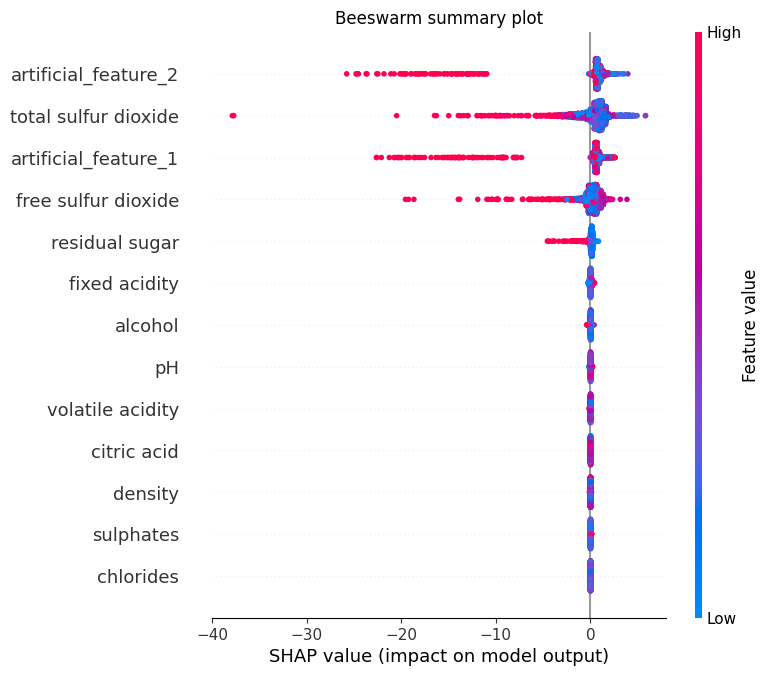

In [56]:
summary_plot(shapley_values_2.numpy(), feature_names=feature_names, features=x_data)

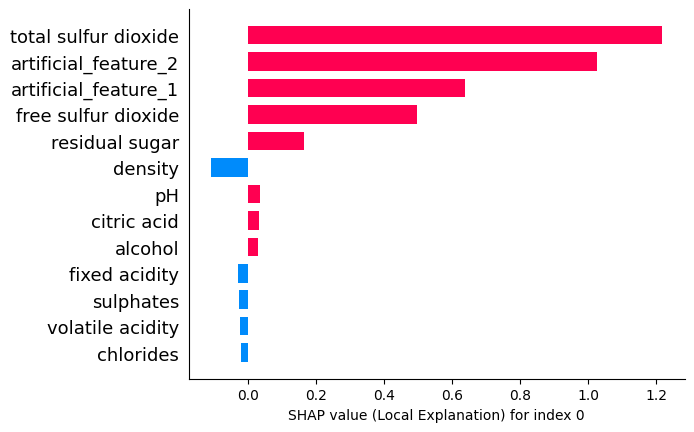

In [70]:
local_bar_plot(shapley_values_2.T, 0, feature_names=feature_names)

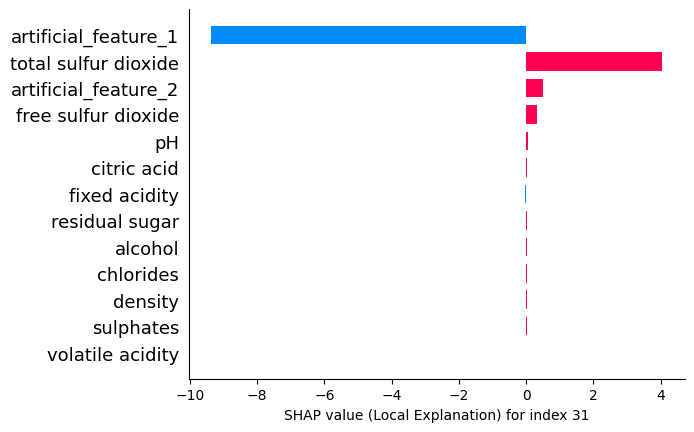

In [58]:
local_bar_plot(shapley_values_2.T, common_indices_1[0], feature_names=feature_names)

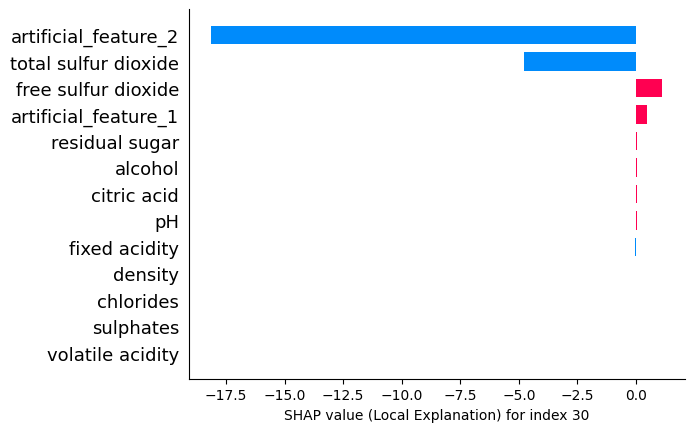

In [59]:
local_bar_plot(shapley_values_2.T, common_indices_2[0], feature_names=feature_names)

In [60]:
correct = 0
wrong_indices = []

for idx in common_indices_1:
    row = shapley_values_2[idx]
    max_index = np.argmax(np.abs(row), axis=0)
    # print(max_index)
    if max_index == 11:
        correct = correct+1
    else:
        wrong_indices.append((idx, max_index))

# The percentage of correct feature selected is
percentage_1 = correct/len(common_indices_1) * 100
percentage_1

/tmp/ipykernel_90341/3533008492.py:6: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  max_index = np.argmax(np.abs(row), axis=0)


100.0

artificial_feature_1 has the highest shapley value for all these points

In [61]:
common_indices_2 = np.intersect1d(indices_feature_2, indices)
len(common_indices_2)

79

In [62]:
correct = 0
wrong_indices = []

for idx in common_indices_2:
    row = shapley_values_2[idx]
    max_index = np.argmax(np.abs(row), axis=0)
    # print(max_index)
    if max_index == 12:
        correct = correct+1
    else:
        wrong_indices.append((idx, max_index))

# The percentage of correct feature selected is
percentage_2 = correct/len(common_indices_2) * 100
percentage_2

/tmp/ipykernel_90341/372471857.py:6: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  max_index = np.argmax(np.abs(row), axis=0)


98.73417721518987

Again all the points have highest shapley value for artificial_feature_2 feature

In [63]:
shapley_values_2.shape

torch.Size([1599, 13])

/tmp/ipykernel_90341/405870907.py:5: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  summed_shapley_values_1 = shapley_values_2[i] + summed_shapley_values_1
/tmp/ipykernel_90341/405870907.py:7: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  summed_shapley_values_2 = shapley_values_2[i] + summed_shapley_values_2


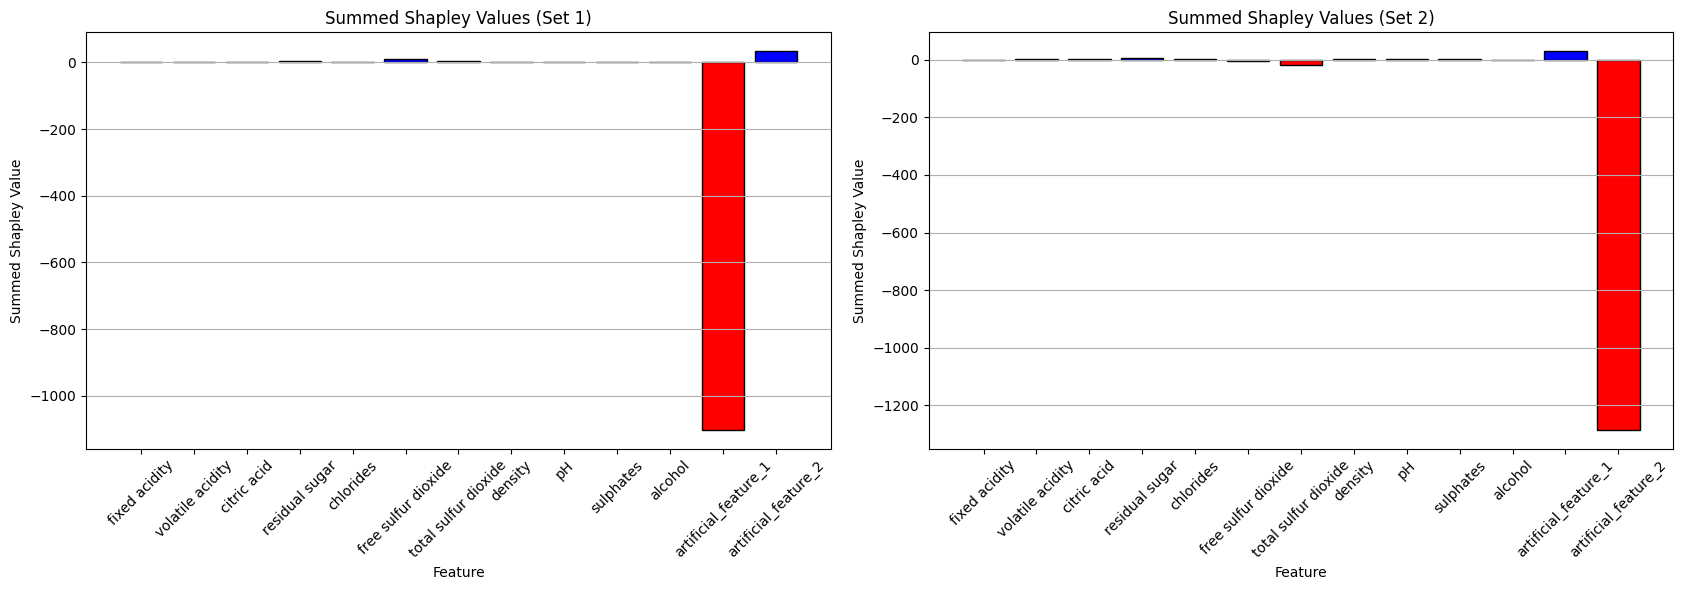

In [64]:
summed_shapley_values_1 = np.zeros(13, dtype='float32')
summed_shapley_values_2 = np.zeros(13, dtype='float32')

for i in indices_feature_1:
    summed_shapley_values_1 = shapley_values_2[i] + summed_shapley_values_1
for i in indices_feature_2: 
    summed_shapley_values_2 = shapley_values_2[i] + summed_shapley_values_2

fig, ax = plt.subplots(1, 2, figsize=(17, 6))

for i, value in enumerate(summed_shapley_values_1):
    color = 'blue' if value >= 0 else 'red'  
    ax[0].bar(i, value, color=color, edgecolor='black')  
ax[0].set_xticks(range(13)), ax[0].set_xticklabels(feature_names, rotation=45)
ax[0].set_title('Summed Shapley Values (Set 1)')
ax[0].set_xlabel('Feature'), ax[0].set_ylabel('Summed Shapley Value')
ax[0].grid(True, axis='y')

for i, value in enumerate(summed_shapley_values_2):
    color = 'blue' if value >= 0 else 'red'  
    ax[1].bar(i, value, color=color, edgecolor='black')  
ax[1].set_xticks(range(13)), ax[1].set_xticklabels(feature_names, rotation=45)
ax[1].set_title('Summed Shapley Values (Set 2)')
ax[1].set_xlabel('Feature'), ax[1].set_ylabel('Summed Shapley Value')
ax[1].grid(True, axis='y')
plt.tight_layout()
plt.show()

/tmp/ipykernel_90341/762840968.py:7: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  summed_shapley_values_other = shapley_values_2[i] + summed_shapley_values_other


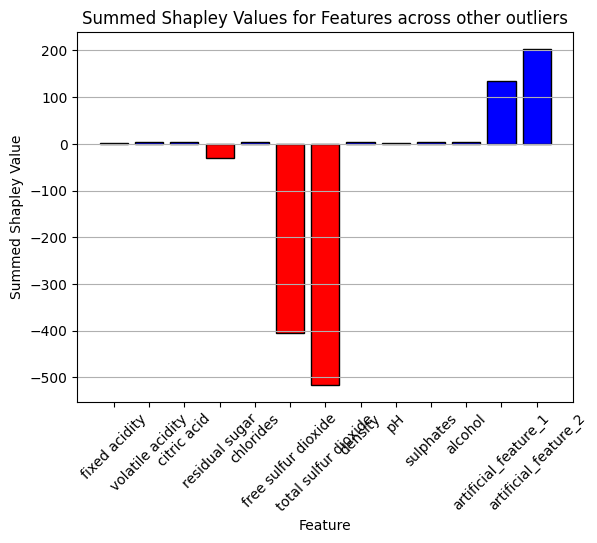

In [65]:
other_outliers = list(set(indices).difference(set(indices_feature_1).union(set(indices_feature_2))))
other_outliers

summed_shapley_values_other = np.zeros(13, dtype='float32')

for i in other_outliers:
    summed_shapley_values_other = shapley_values_2[i] + summed_shapley_values_other

for i, value in enumerate(summed_shapley_values_other):
    color = 'blue' if value >= 0 else 'red' 
    plt.bar(i, value, color=color, edgecolor='black')  #

plt.xticks(range(13), feature_names)
plt.xticks(rotation=45)  
plt.title('Summed Shapley Values for Features across other outliers')
plt.xlabel('Feature')
plt.ylabel('Summed Shapley Value')
plt.grid(True, axis='y')
plt.show()

/tmp/ipykernel_90341/3782488457.py:2: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  mean_abs_shap_values_2 = np.abs(shapley_values_2).mean(axis=0)  # (num_features,)


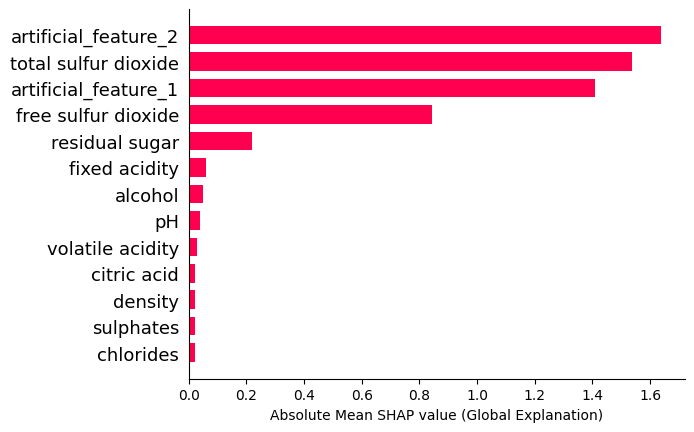

In [66]:
# global importance measure
mean_abs_shap_values_2 = np.abs(shapley_values_2).mean(axis=0)  # (num_features,)

# Call bar_plot for global explanation
global_bar_plot(mean_abs_shap_values_2, feature_names=feature_names)

/tmp/ipykernel_90341/605810194.py:2: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  mean_abs_shap_values_outlier_group_1 = np.abs(selected_shap_values).mean(axis=0)


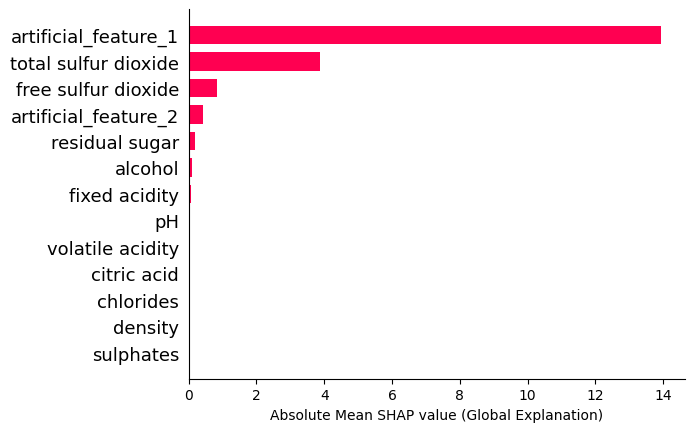

In [67]:
selected_shap_values = shapley_values_2[indices_feature_1, :]
mean_abs_shap_values_outlier_group_1 = np.abs(selected_shap_values).mean(axis=0) 
global_bar_plot(mean_abs_shap_values_outlier_group_1, feature_names=feature_names)

/tmp/ipykernel_90341/3457295048.py:2: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  mean_abs_shap_values_outlier_group_2 = np.abs(selected_shap_values).mean(axis=0)


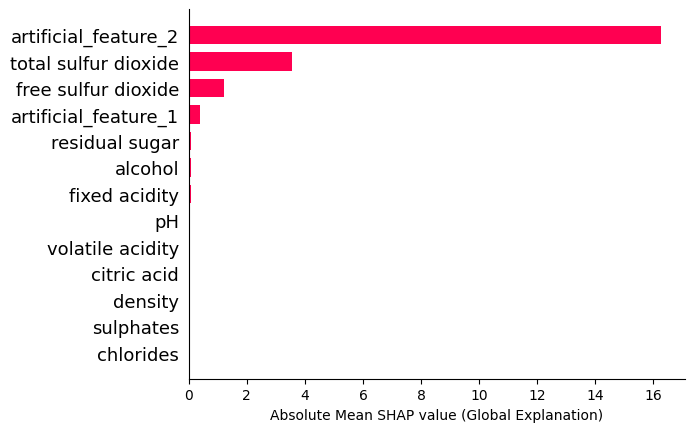

In [68]:
selected_shap_values = shapley_values_2[indices_feature_2, :]
mean_abs_shap_values_outlier_group_2 = np.abs(selected_shap_values).mean(axis=0) 
global_bar_plot(mean_abs_shap_values_outlier_group_2, feature_names=feature_names)

In [2]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv'
wine_data = pd.read_csv(url, sep=';')
wine_data.columns
selected_columns = wine_data.drop(columns=["quality"])
selected_columns
# Set random seed for reproducibility
np.random.seed(9)

# Initialize the new features
selected_columns['artificial_feature_1'] = np.random.randint(1, 6, size=len(selected_columns))
selected_columns['artificial_feature_2'] = np.random.randint(1, 6, size=len(selected_columns))

selected_columns
# Calculate the number of samples
num_samples = selected_columns.shape[0]
num_samples_to_modify = int(num_samples * 0.05)
num_samples_to_modify
feature_names = selected_columns.columns.tolist()
feature_names
# Randomly select 5% of the indices for artificial_feature_1
indices_feature_1 = np.random.choice(selected_columns.index, size=num_samples_to_modify, replace=False)

# Assign a large value to artificial_feature_1 for these indices
selected_columns.loc[indices_feature_1, 'artificial_feature_1'] = np.random.randint(100, 150, size=len(indices_feature_1))
# Randomly select 5% of the indices for artificial_feature_2, ensuring no overlap
remaining_indices = np.setdiff1d(selected_columns.index, indices_feature_1)
indices_feature_2 = np.random.choice(remaining_indices, size=num_samples_to_modify, replace=False)

# Assign a large value to artificial_feature_2 for these indices
selected_columns.loc[indices_feature_2, 'artificial_feature_2'] = np.random.randint(100, 150, size=len(indices_feature_2))
selected_columns
non_zero_count_feature_1 = (selected_columns['artificial_feature_1'] > 5).sum()
non_zero_count_feature_1
non_zero_count_feature_2 = (selected_columns['artificial_feature_2'] > 5).sum()
non_zero_count_feature_2
x_data = (selected_columns.values)
x_data.shape

(4898, 13)

In [3]:
classifier = OneClassSVMClassifier(x_data, nu=0.21)
decision, y_pred = classifier.fit()
counts = {1: np.sum(y_pred == 1), -1: np.sum(y_pred == -1)}
total = len(y_pred)
percentages = {key: (count / total) * 100 for key, count in counts.items()}

results = {key: {"count": counts[key], "percentage": percentages[key]} for key in counts}

print(results)
indices = [i for i, value in enumerate(y_pred) if value == -1]
print(indices)
outlier_features = x_data[indices]
outlier_features
# Check if all points in the feature arrays are in the indices array
all_in_indices_1 = np.all(np.isin(indices_feature_1, indices))
all_in_indices_2 = np.all(np.isin(indices_feature_2, indices))

# Find missing indices from the feature arrays
missing_indices_1 = indices_feature_1[~np.isin(indices_feature_1, indices)]
missing_indices_2 = indices_feature_2[~np.isin(indices_feature_2, indices)]

# Calculate the total number of points in the feature arrays
total_points_feature_1 = len(indices_feature_1)
total_points_feature_2 = len(indices_feature_2)

# Calculate the percentage of points covered
covered_points_1 = total_points_feature_1 - len(missing_indices_1)
covered_points_2 = total_points_feature_2 - len(missing_indices_2)

percentage_covered_1 = (covered_points_1 / total_points_feature_1) * 100
percentage_covered_2 = (covered_points_2 / total_points_feature_2) * 100
if all_in_indices_1:
    print("All indices from Feature 1 are present in the indices array.")
else:
    print(f"Missing indices from Feature 1: {sorted(missing_indices_1)}")
    
if all_in_indices_2:
    print("All indices from Feature 2 are present in the indices array.")
else:
    print(f"Missing indices from Feature 2: {sorted(missing_indices_2)}")

# Print percentage coverage
print(f"Percentage of points covered in Feature 1: {percentage_covered_1:.2f}%")
print(f"Percentage of points covered in Feature 2: {percentage_covered_2:.2f}%")
common_indices_1 = np.intersect1d(indices_feature_1, indices)
len(common_indices_1)
common_indices_2 = np.intersect1d(indices_feature_2, indices)
len(common_indices_2)



[[1.         0.42833048 0.17360676 ... 0.28635537 0.24353089 0.15490947]
 [0.42833048 1.         0.62647284 ... 0.80497726 0.84963527 0.68457557]
 [0.17360676 0.62647284 1.         ... 0.92942418 0.90459063 0.96694376]
 ...
 [0.28635537 0.80497726 0.92942418 ... 1.         0.96483369 0.92867802]
 [0.24353089 0.84963527 0.90459063 ... 0.96483369 1.         0.95326943]
 [0.15490947 0.68457557 0.96694376 ... 0.92867802 0.95326943 1.        ]]
[0.9999993  0.99999944 0.99999994 ... 0.99999987 0.99999989 0.99999998]
[  10   18   25 ... 4867 4887 4893]
161.239888238234
{1: {'count': np.int64(3870), 'percentage': np.float64(79.01184156798693)}, -1: {'count': np.int64(1028), 'percentage': np.float64(20.988158432013066)}}
[10, 18, 25, 28, 31, 34, 40, 44, 49, 51, 67, 69, 70, 71, 73, 76, 81, 91, 94, 95, 98, 99, 111, 113, 125, 130, 132, 145, 151, 153, 159, 160, 166, 169, 172, 174, 180, 183, 184, 185, 194, 195, 196, 197, 202, 203, 227, 228, 231, 245, 252, 253, 259, 263, 269, 274, 277, 278, 282, 287,

244

In [4]:
from src.explanation_algorithms.OCSVMSHAP import OCSVMSHAP
ocsvm_shap = OCSVMSHAP(X=x_data, classifier=classifier)
ocsvm_shap.fit_ocsvmshap(X=x_data, num_coalitions=2**x_data.shape[1])

/home/swathi/OCSVM-SHAP/src/utils/shapley_procedure/coalitions.py:18: RuntimeWarning: divide by zero encountered in log2
  set_to_1 = np.floor(np.log2(rest)).astype(int)
/home/swathi/OCSVM-SHAP/src/utils/shapley_procedure/coalitions.py:18: RuntimeWarning: invalid value encountered in cast
  set_to_1 = np.floor(np.log2(rest)).astype(int)
/home/swathi/OCSVM-SHAP/src/utils/shapley_procedure/coalitions.py:18: RuntimeWarning: invalid value encountered in log2
  set_to_1 = np.floor(np.log2(rest)).astype(int)
Parallel projections: 100%|██████████| 8191/8191 [2:22:37<00:00,  1.04s/it]  


/home/swathi/micromamba/envs/py311/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/swathi/OCSVM-SHAP/src/utils/visualisation/deterministic_values.py:17: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shapley_values, show=False, **kwargs)


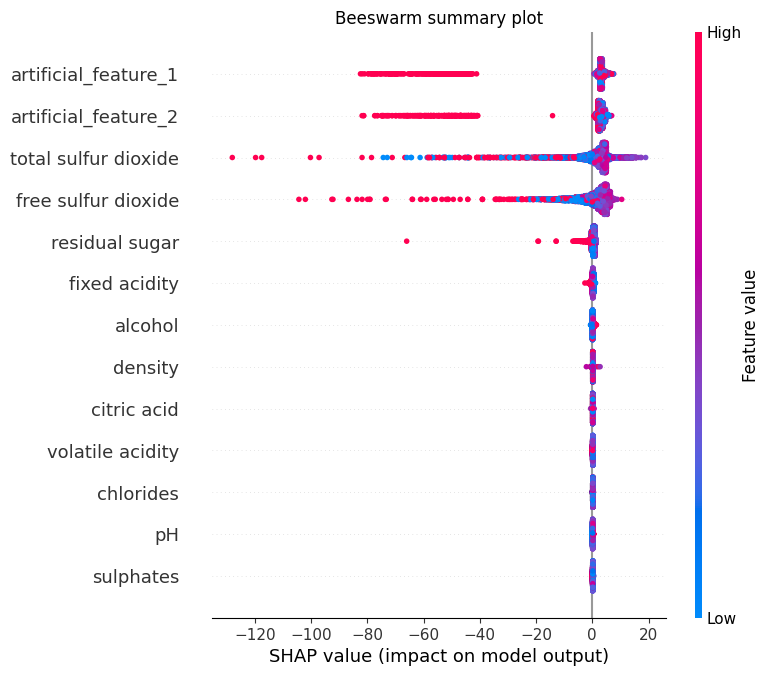

In [5]:
import torch 
from src.utils.visualisation.deterministic_values import global_bar_plot, local_bar_plot, summary_plot
shapley_values_2 = ocsvm_shap.return_deterministic_shapley_values()
torch.save(shapley_values_2, "shapley_values_2.pt")
shapley_values_2 = shapley_values_2.T
summary_plot(shapley_values_2.numpy(), feature_names=feature_names, features=x_data)

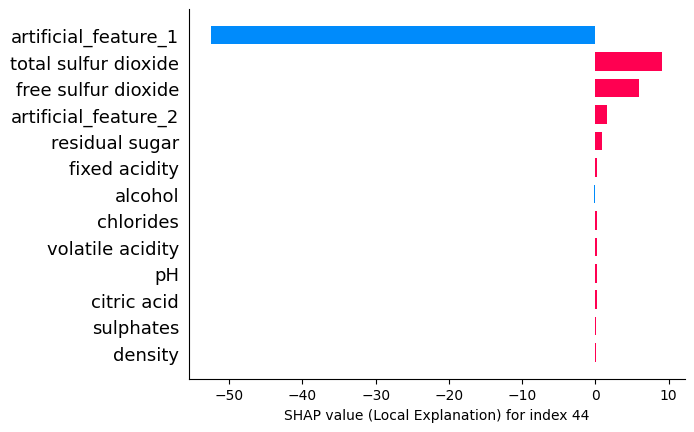

In [6]:
local_bar_plot(shapley_values_2.T, common_indices_1[0], feature_names=feature_names)

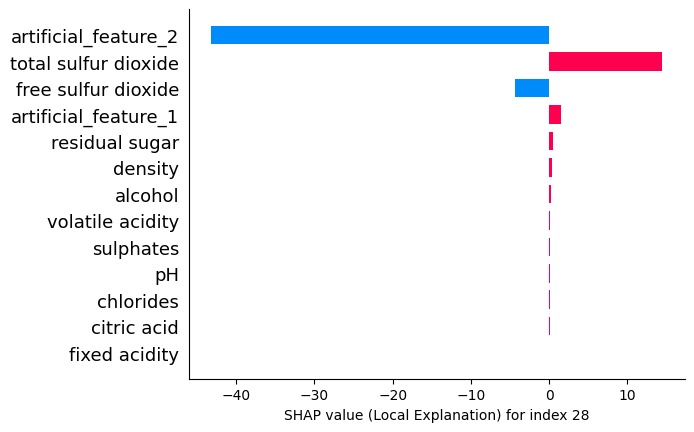

In [7]:
local_bar_plot(shapley_values_2.T, common_indices_2[0], feature_names=feature_names)


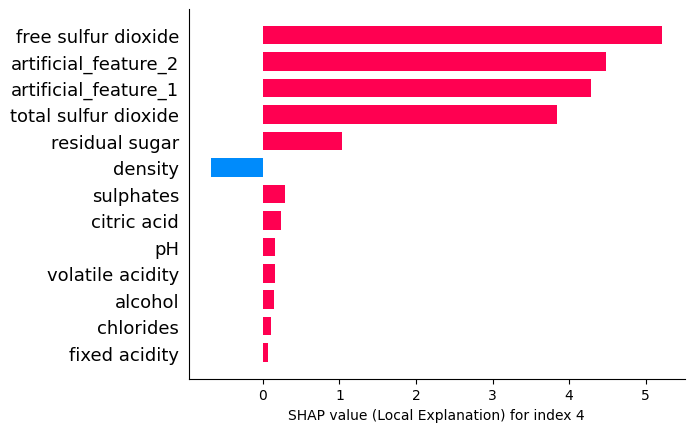

In [8]:
local_bar_plot(shapley_values_2.T, 4 ,feature_names=feature_names)


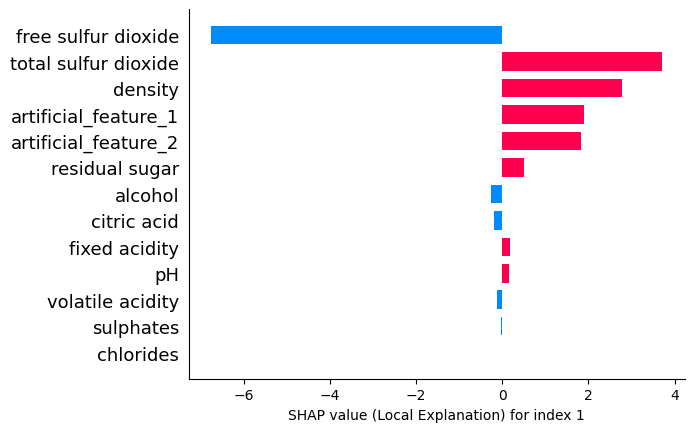

In [18]:
local_bar_plot(shapley_values_2.T, 1 ,feature_names=feature_names)


In [9]:
correct = 0
wrong_indices = []

for idx in common_indices_1:
    row = shapley_values_2[idx]
    max_index = np.argmax(np.abs(row), axis=0)
    # print(max_index)
    if max_index == 11:
        correct = correct+1
    else:
        wrong_indices.append((idx, max_index))

# The percentage of correct feature selected is
percentage_1 = correct/len(common_indices_1) * 100
percentage_1

/tmp/ipykernel_3916/3533008492.py:6: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  max_index = np.argmax(np.abs(row), axis=0)


98.36065573770492

In [10]:
common_indices_2 = np.intersect1d(indices_feature_2, indices)
len(common_indices_2)
correct = 0
wrong_indices = []

for idx in common_indices_2:
    row = shapley_values_2[idx]
    max_index = np.argmax(np.abs(row), axis=0)
    # print(max_index)
    if max_index == 12:
        correct = correct+1
    else:
        wrong_indices.append((idx, max_index))

# The percentage of correct feature selected is
percentage_2 = correct/len(common_indices_2) * 100
percentage_2

/tmp/ipykernel_3916/4247811314.py:8: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  max_index = np.argmax(np.abs(row), axis=0)


98.77049180327869

/tmp/ipykernel_3916/2808519106.py:6: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  summed_shapley_values_1 = shapley_values_2[i] + summed_shapley_values_1
/tmp/ipykernel_3916/2808519106.py:8: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  summed_shapley_values_2 = shapley_values_2[i] + summed_shapley_values_2


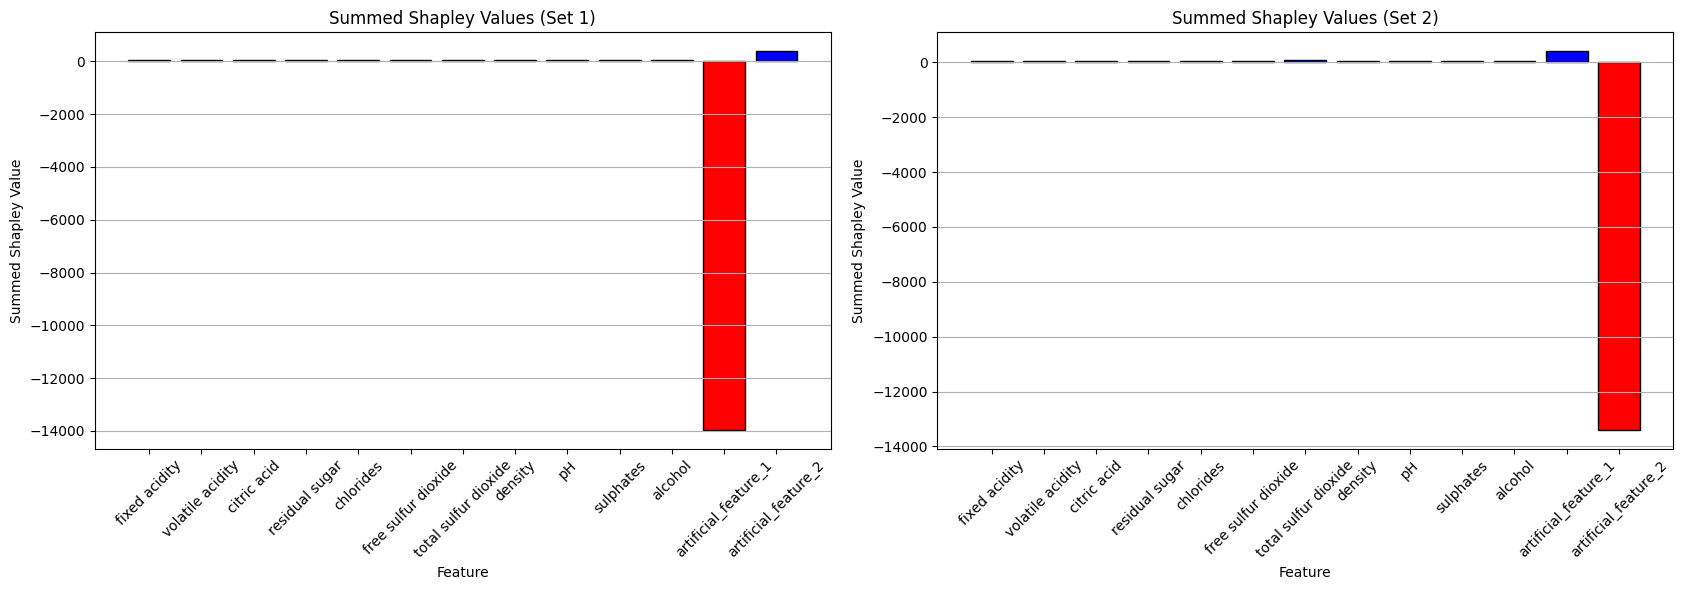

In [11]:
shapley_values_2.shape
summed_shapley_values_1 = np.zeros(13, dtype='float32')
summed_shapley_values_2 = np.zeros(13, dtype='float32')

for i in indices_feature_1:
    summed_shapley_values_1 = shapley_values_2[i] + summed_shapley_values_1
for i in indices_feature_2: 
    summed_shapley_values_2 = shapley_values_2[i] + summed_shapley_values_2

fig, ax = plt.subplots(1, 2, figsize=(17, 6))

for i, value in enumerate(summed_shapley_values_1):
    color = 'blue' if value >= 0 else 'red'  
    ax[0].bar(i, value, color=color, edgecolor='black')  
ax[0].set_xticks(range(13)), ax[0].set_xticklabels(feature_names, rotation=45)
ax[0].set_title('Summed Shapley Values (Set 1)')
ax[0].set_xlabel('Feature'), ax[0].set_ylabel('Summed Shapley Value')
ax[0].grid(True, axis='y')

for i, value in enumerate(summed_shapley_values_2):
    color = 'blue' if value >= 0 else 'red'  
    ax[1].bar(i, value, color=color, edgecolor='black')  
ax[1].set_xticks(range(13)), ax[1].set_xticklabels(feature_names, rotation=45)
ax[1].set_title('Summed Shapley Values (Set 2)')
ax[1].set_xlabel('Feature'), ax[1].set_ylabel('Summed Shapley Value')
ax[1].grid(True, axis='y')
plt.tight_layout()
plt.show()

/tmp/ipykernel_3916/2767693026.py:7: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  summed_shapley_values_other = shapley_values_2[i] + summed_shapley_values_other


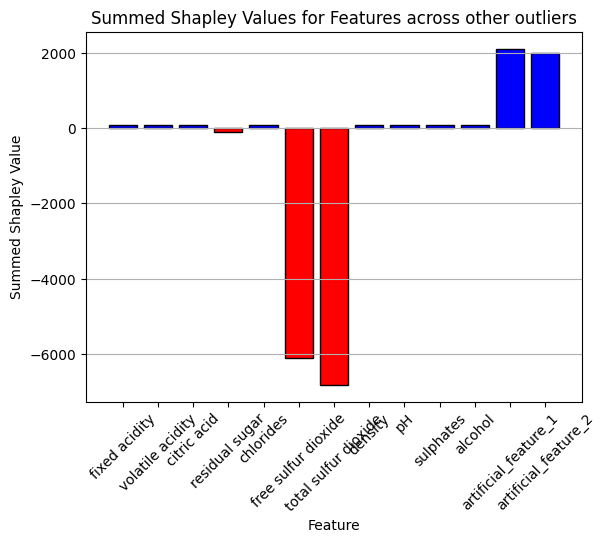

In [12]:
other_outliers = list(set(indices).difference(set(indices_feature_1).union(set(indices_feature_2))))
other_outliers

summed_shapley_values_other = np.zeros(13, dtype='float32')

for i in other_outliers:
    summed_shapley_values_other = shapley_values_2[i] + summed_shapley_values_other

for i, value in enumerate(summed_shapley_values_other):
    color = 'blue' if value >= 0 else 'red' 
    plt.bar(i, value, color=color, edgecolor='black')  #

plt.xticks(range(13), feature_names)
plt.xticks(rotation=45)  
plt.title('Summed Shapley Values for Features across other outliers')
plt.xlabel('Feature')
plt.ylabel('Summed Shapley Value')
plt.grid(True, axis='y')
plt.show()


/tmp/ipykernel_3916/1088808492.py:2: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  mean_abs_shap_values_2 = np.abs(shapley_values_2).mean(axis=0)  # (num_features,)
/home/swathi/OCSVM-SHAP/src/utils/visualisation/deterministic_values.py:12: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at /pytorch/aten/src/ATen/native/TensorShape.cpp:3725.)
  shap.bar_plot(shapley_values.T, show=False, max_display=20,**kwargs)


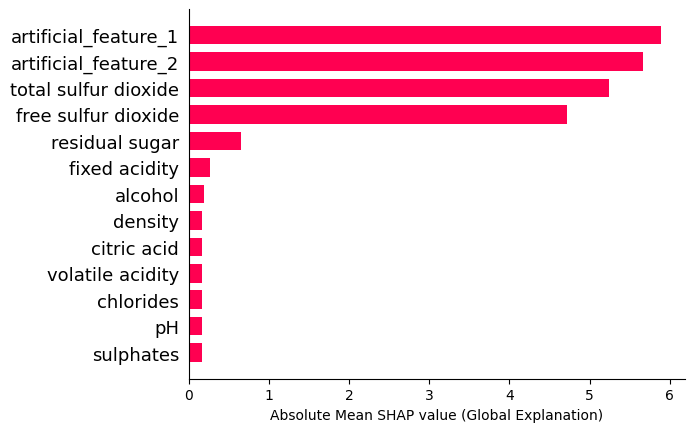

In [13]:
# global importance measure
mean_abs_shap_values_2 = np.abs(shapley_values_2).mean(axis=0)  # (num_features,)

# Call bar_plot for global explanation
global_bar_plot(mean_abs_shap_values_2, feature_names=feature_names)


In [14]:
selected_shap_values = shapley_values_2[indices_feature_1, :]
mean_abs_shap_values_outlier_group_1 = np.abs(selected_shap_values).mean(axis=0) 


/tmp/ipykernel_3916/2598993394.py:2: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  mean_abs_shap_values_outlier_group_1 = np.abs(selected_shap_values).mean(axis=0)


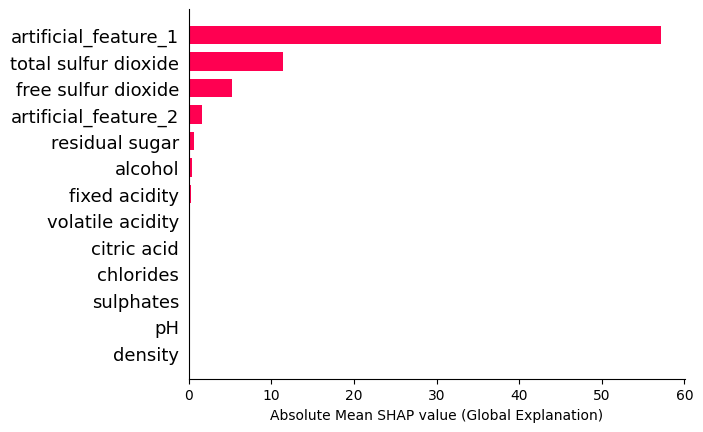

In [15]:
global_bar_plot(mean_abs_shap_values_outlier_group_1, feature_names=feature_names)
selected_shap_values = shapley_values_2[indices_feature_2, :]


/tmp/ipykernel_3916/1127251644.py:1: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  mean_abs_shap_values_outlier_group_2 = np.abs(selected_shap_values).mean(axis=0)


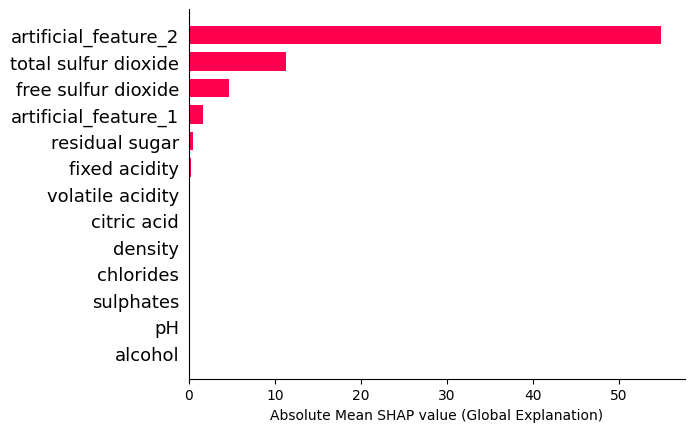

In [16]:
mean_abs_shap_values_outlier_group_2 = np.abs(selected_shap_values).mean(axis=0) 
global_bar_plot(mean_abs_shap_values_outlier_group_2, feature_names=feature_names)